In [535]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

In [536]:
result_dir = Path("result/zi_10000")
security_path = result_dir / "TSMC.json"
agent_path = result_dir / "agent.json"
tsmc = pd.read_json(security_path)

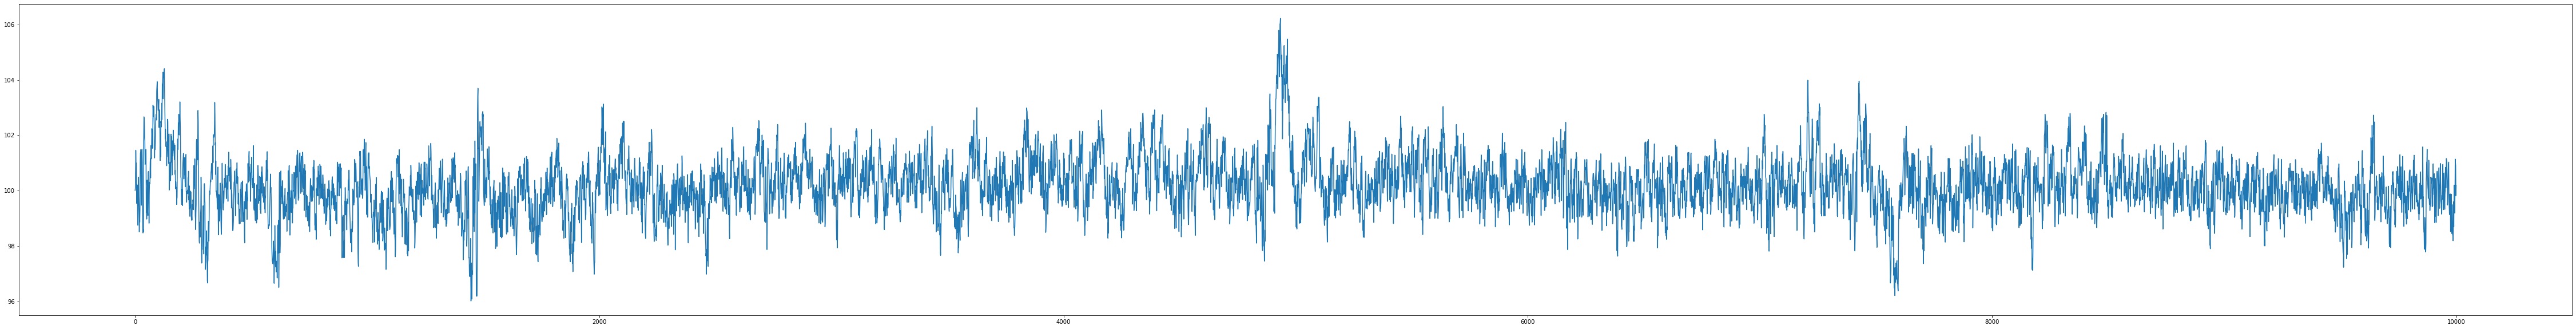

In [547]:
tsmc['average'].plot(figsize = (80, 10))

In [538]:
agent = pd.read_json(agent_path)

In [539]:
group_names = agent.columns
num_of_timesteps = len(agent[group_names[0]]['CASH'])
print(group_names)
print(agent[agent.columns[0]].index)

Index(['zi_10000', 'tr_100', 'mr_100', 'fu_100'], dtype='object')
Index(['CASH', 'TSMC', 'WEALTH', 'initial_wealth_by_agent', 'returns_by_agent',
       'returns_by_step'],
      dtype='object')


In [540]:
# normalize 
wealth = np.array([agent[group_name]['WEALTH'] for group_name in group_names])
std_wealth = (wealth - wealth[:, 0].reshape(-1, 1)) / wealth[:, 0].reshape(-1, 1)


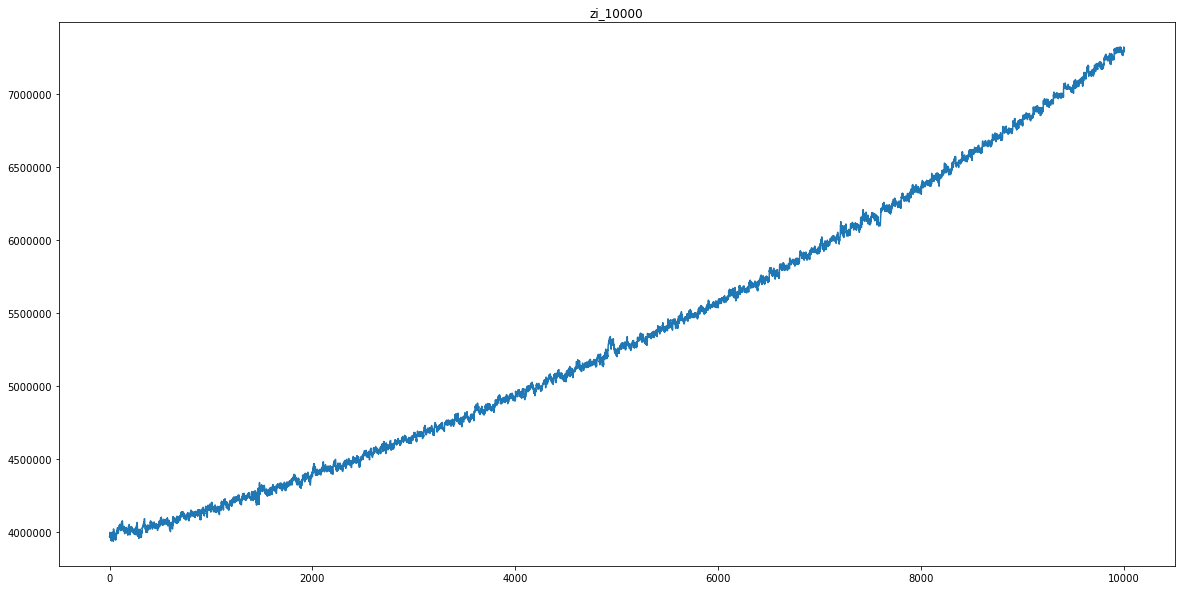

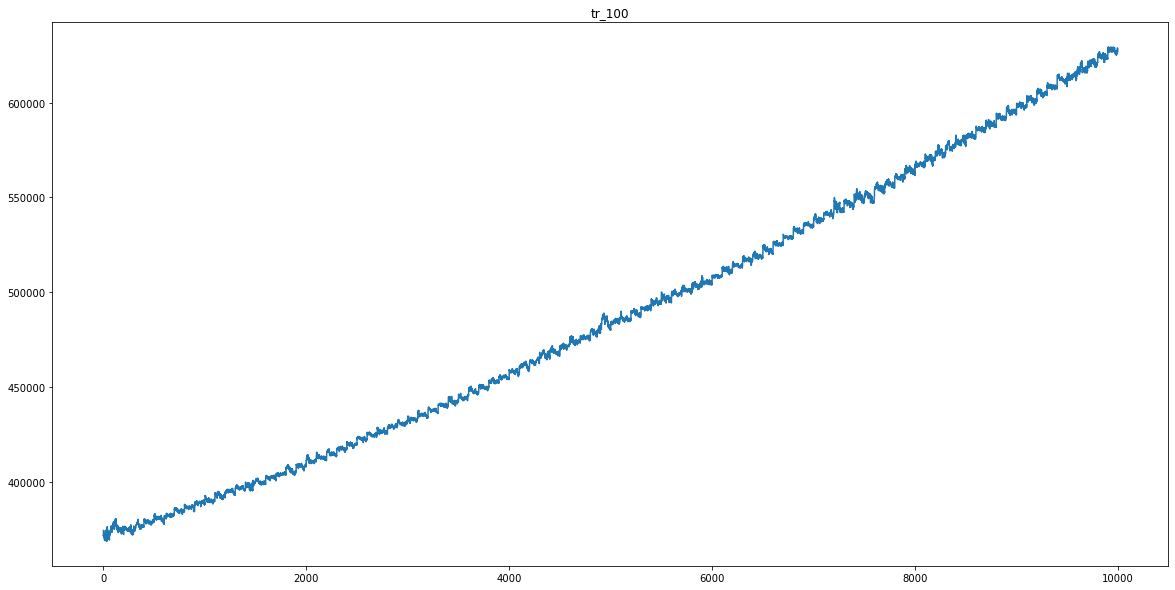

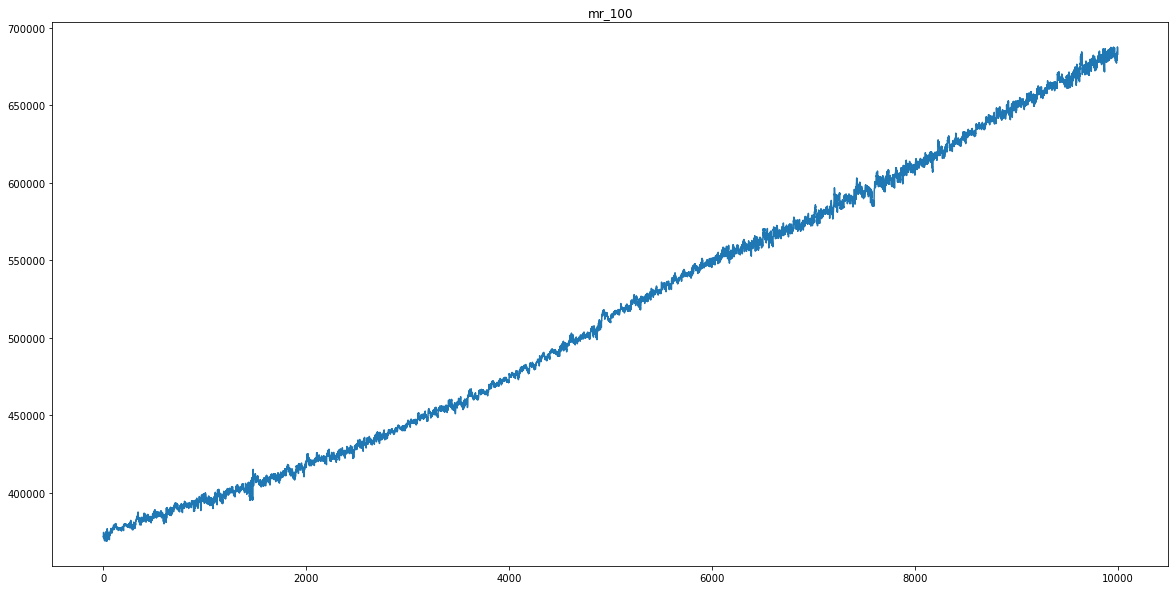

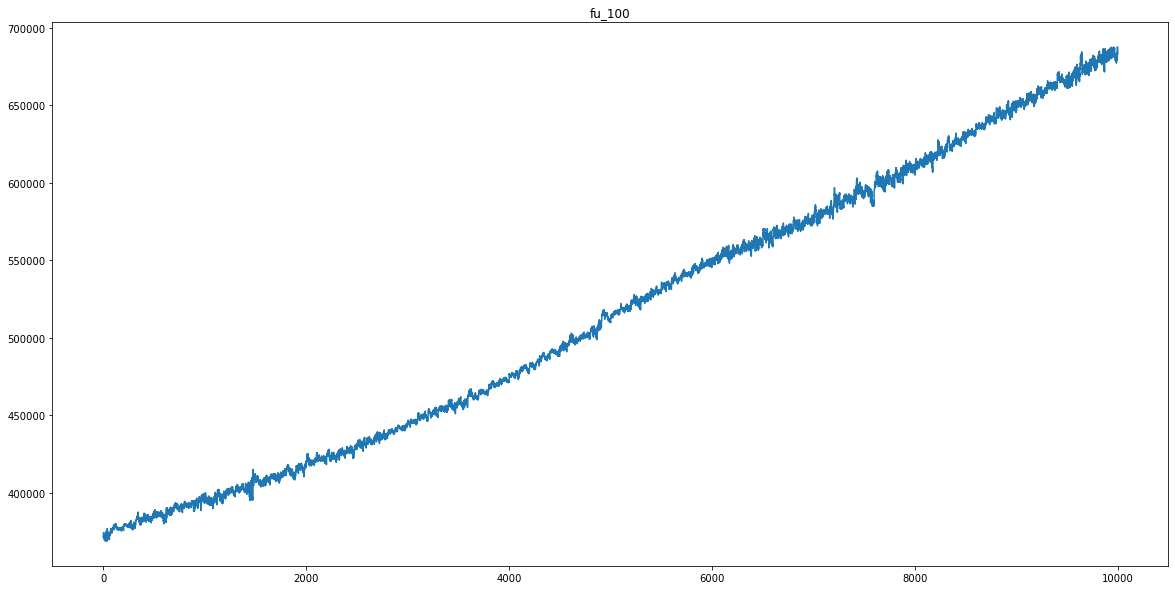

In [541]:
# for agent_type in agent.columns:
for group_name in agent.columns:
    plt.figure(figsize=(20, 10))
    plt.plot(agent[group_name]['WEALTH'])
    plt.title(group_name)
    plt.show()
# for i in range(len(agent.columns)):
#     plt.figure(figsize=(20, 10))
#     plt.plot(agent.iloc[:, i])
#     plt.title(agent.columns[i])
#     plt.show()

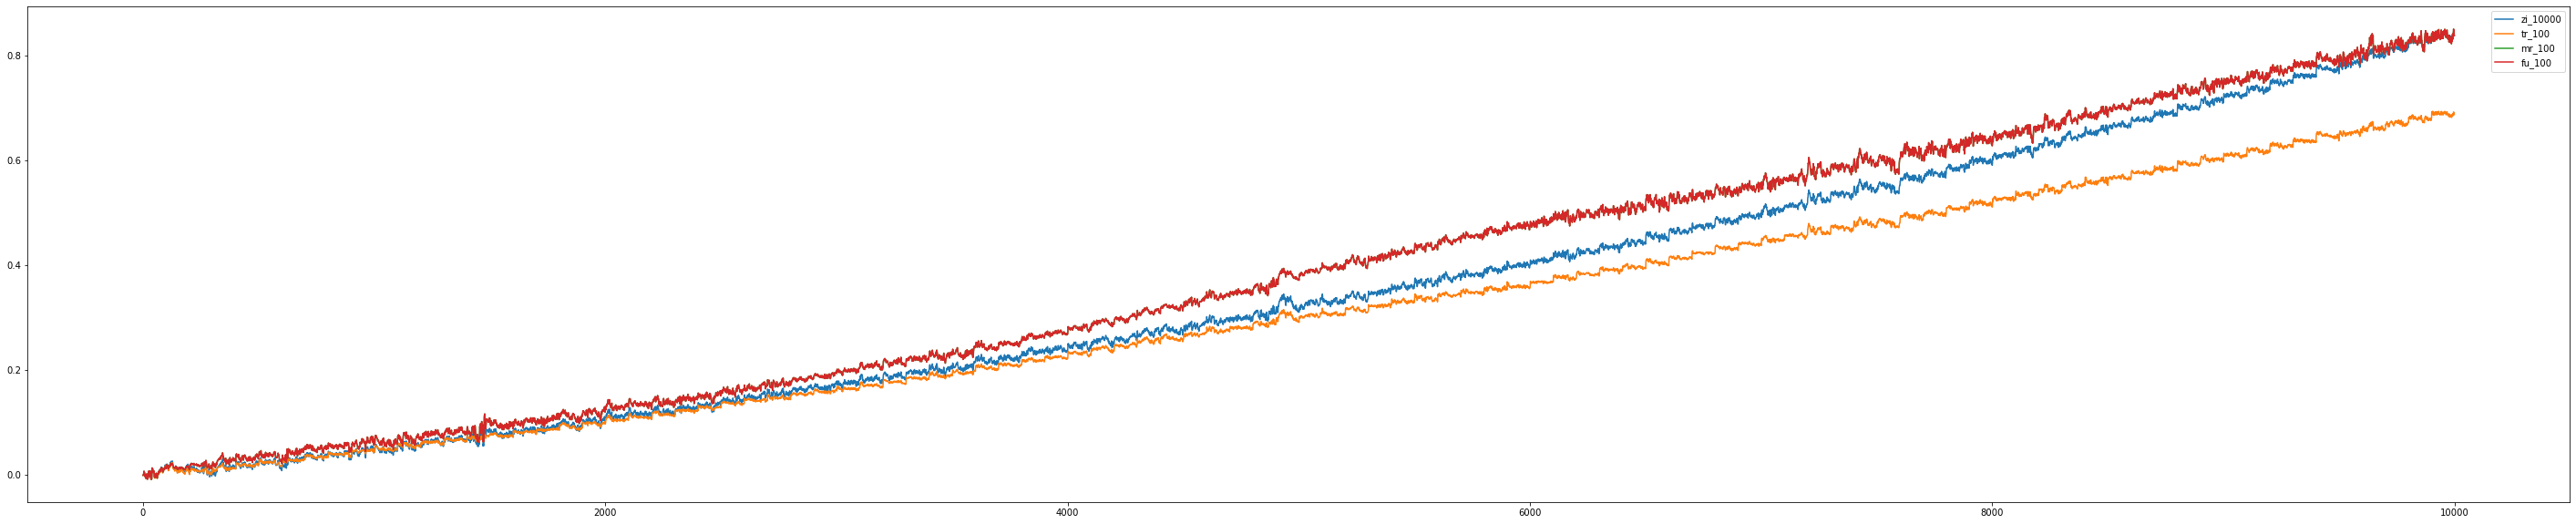

In [542]:
plt.figure(figsize=(50, 10))
for i, group_name in enumerate(agent.columns):
    plt.plot(std_wealth[i], label = group_names[i])
plt.legend()

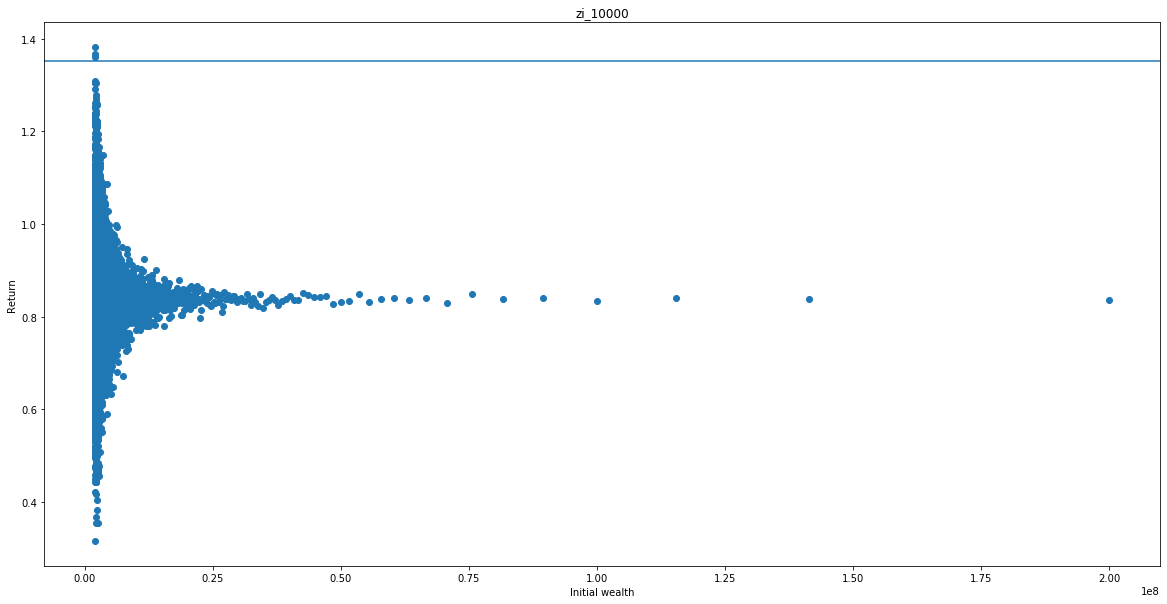

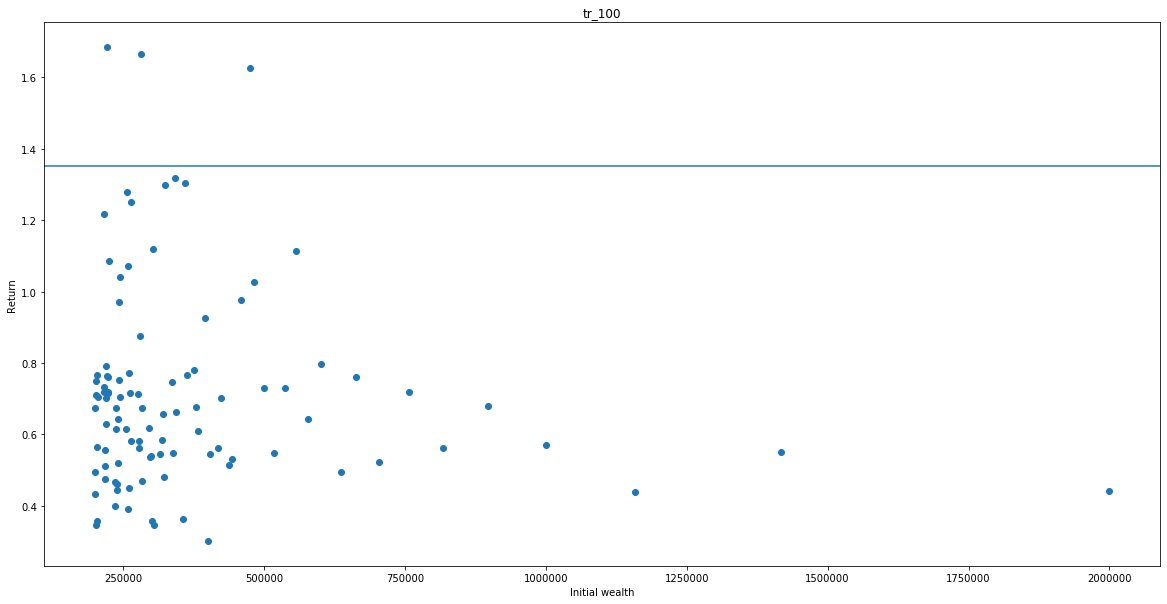

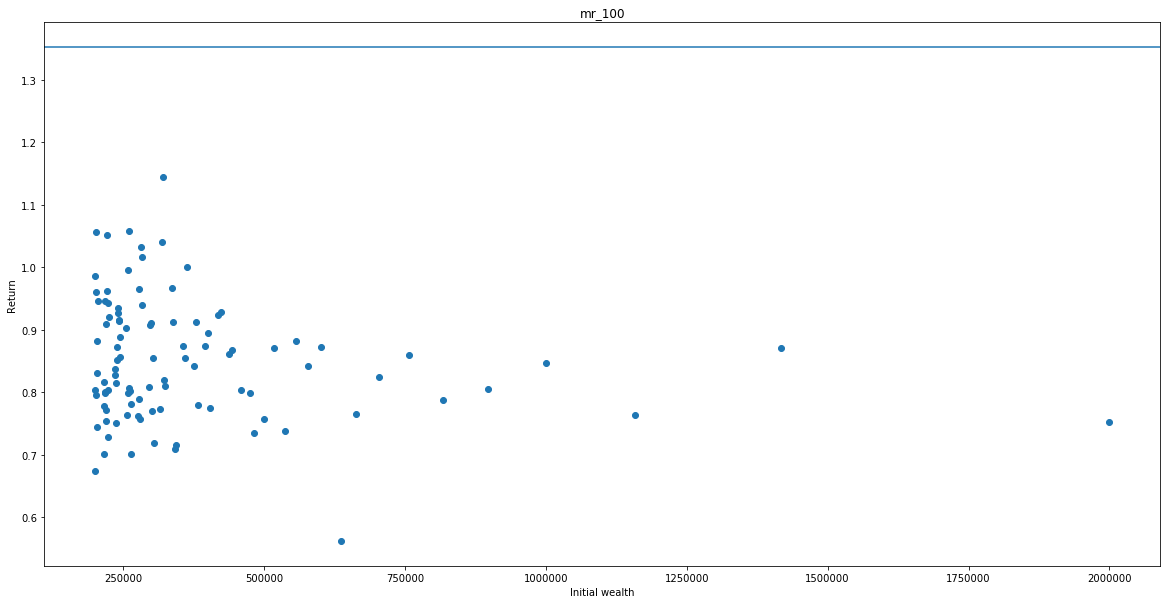

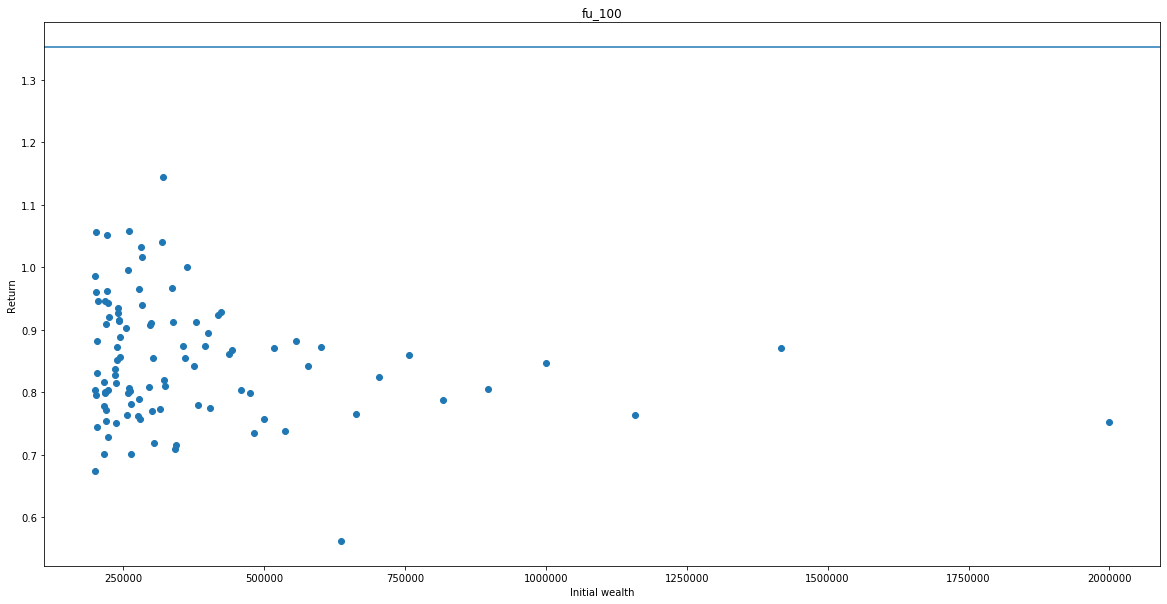

In [543]:
baseline_return = pow(1.01, 100) / 2
for group_name in group_names:
    plt.figure(figsize=(20, 10))
    plt.axhline(y = baseline_return)
    plt.scatter(agent[group_name]['initial_wealth_by_agent'], np.array(agent[group_name]['returns_by_agent']))
    plt.xlabel('Initial wealth')
    plt.ylabel('Return')
    plt.title(f"{group_name}")
    plt.show()

In [544]:
pow(1.01, 100)

2.7048138294215285